In [1]:
import pandas as pd
import numpy as np

In [4]:
from google.colab import files
upload = files.upload()

Saving adult(in).csv to adult(in).csv


In [45]:
dataset = pd.read_csv('adult(in).csv')

In [50]:
dataset['sex'] = dataset['sex'].map({'Female': 0, 'Male': 1})
dataset['sex'] = dataset['sex'].fillna(-1)
dataset['income'] = dataset['income'].map({'<=50K': 0, '>50K': 1})
dataset['income'] = dataset['income'].fillna(-1)
print(dataset)

       age  education.num  sex  capital.gain  capital.loss  hours.per.week  \
0       90              9    0             0          4356              40   
1       82              9    0             0          4356              18   
2       66             10    0             0          4356              40   
3       54              4    0             0          3900              40   
4       41             10    0             0          3900              40   
...    ...            ...  ...           ...           ...             ...   
32556   22             10    1             0             0              40   
32557   27             12    0             0             0              38   
32558   40              9    1             0             0              40   
32559   58              9    0             0             0              40   
32560   22              9    1             0             0              20   

       income  
0           0  
1           0  
2           0  

In [51]:
print(dataset.shape)

(32561, 7)


In [52]:
print(dataset.head(10))

   age  education.num  sex  capital.gain  capital.loss  hours.per.week  income
0   90              9    0             0          4356              40       0
1   82              9    0             0          4356              18       0
2   66             10    0             0          4356              40       0
3   54              4    0             0          3900              40       0
4   41             10    0             0          3900              40       0
5   34              9    0             0          3770              45       0
6   38              6    1             0          3770              40       0
7   74             16    0             0          3683              20       1
8   68              9    0             0          3683              40       0
9   41             10    1             0          3004              60       1


In [53]:
x=dataset.iloc[:,:-1].values
print(x)

[[  90    9    0    0 4356   40]
 [  82    9    0    0 4356   18]
 [  66   10    0    0 4356   40]
 ...
 [  40    9    1    0    0   40]
 [  58    9    0    0    0   40]
 [  22    9    1    0    0   20]]


In [54]:
y=dataset.iloc[:,-1].values
print(y)

[0 0 0 ... 1 0 0]


In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=0)

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train,x_test)

[[ 0.17780667 -0.03649105  0.69865371 -0.14474897 -0.21852035  0.85163208]
 [-0.99324468  1.13074461  0.69865371 -0.14474897 -0.21852035 -1.2548683 ]
 [-0.99324468 -0.42556961 -1.43132426 -0.14474897 -0.21852035 -0.03957962]
 ...
 [-0.92005397 -0.81464816  0.69865371 -0.14474897 -0.21852035  0.85163208]
 [ 0.39737879  1.51982317  0.69865371 -0.14474897 -0.21852035 -0.03957962]
 [ 0.03142525 -0.42556961  0.69865371  0.83321509 -0.21852035 -0.03957962]] [[ 1.2756673  -1.98188383 -1.43132426 -0.14474897 -0.21852035 -0.03957962]
 [-1.43238893 -0.42556961 -1.43132426 -0.14474897 -0.21852035 -1.2548683 ]
 [-1.1396261  -0.03649105 -1.43132426 -0.14474897 -0.21852035 -0.44467585]
 ...
 [-0.55410042  0.3525875   0.69865371 -0.14474897  4.06403307 -0.03957962]
 [ 0.17780667 -1.59280527 -1.43132426 -0.14474897 -0.21852035 -0.03957962]
 [-0.11495617  1.13074461 -1.43132426 -0.14474897 -0.21852035 -0.03957962]]


Text(0, 0.5, 'Mean Error')

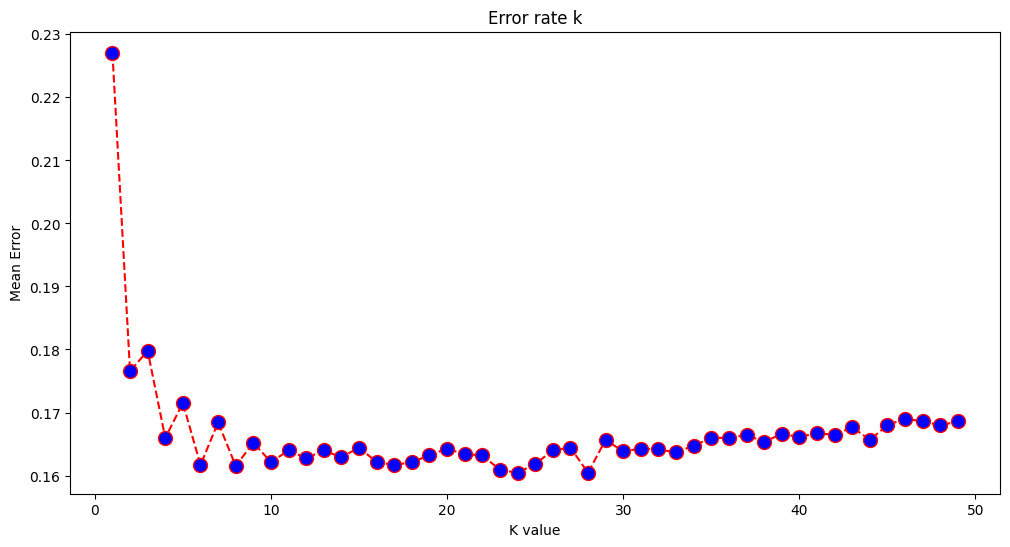

In [61]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
for i in range(1,50):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train,y_train)
  pred_i = model.predict(x_test)
  error.append(np.mean(pred_i!=y_test))
plt.figure(figsize = (12,6))
plt.plot(range(1,50), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error rate k')
plt.xlabel('K value')
plt.ylabel('Mean Error')

In [72]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 6, metric ='minkowski', p=2)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [80]:
age = int(input("Enter Employee's Age:"))
edu = int(input("Enter Employee's Education Number:"))
sex = int(input("Enter Employee's Gender:"))
gain = int(input("Enter Employee's Capital gain:"))
loss = int(input("Enter Employee's Capital loss:"))
hours = int(input("Enter Employee's Hours per week:"))
new = [[age,edu,sex,gain,loss,hours]]
result = model.predict(sc.transform(new))
print(result)
if result == 1:
  print("Employee has the possibility of getting salary above 50K")
else:
  print("Employee might not get salary above 50K")

Enter Employee's Age:55
Enter Employee's Education Number:13
Enter Employee's Gender:1
Enter Employee's Capital gain:0
Enter Employee's Capital loss:2415
Enter Employee's Hours per week:50
[1]
Employee has the possibility of getting salary above 50K


In [77]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.8383233532934131


In [64]:
from sklearn.metrics import classification_report

In [67]:
# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.94      0.90      4966
           1       0.73      0.47      0.57      1547

    accuracy                           0.83      6513
   macro avg       0.79      0.71      0.73      6513
weighted avg       0.82      0.83      0.82      6513



In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[4692  274]
 [ 824  723]]


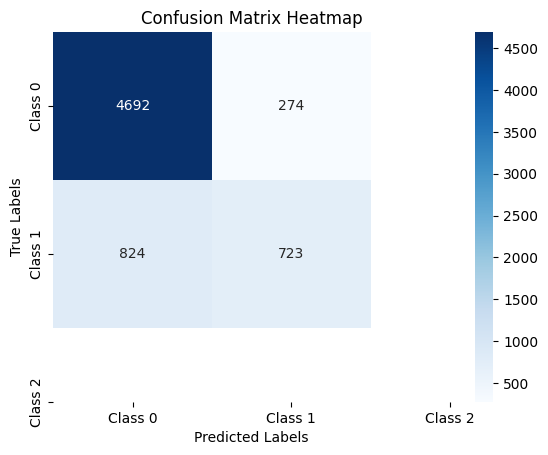

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class 0", "Class 1", "Class 2"],
            yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.show()
